# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np

# Ref Estado del trafico

In [23]:
v = pd.read_json('raw/tramoswgs84.json', 
             )

In [32]:
ls=[]
for k in v.index:
    # Extract values
    ls.append(pd.Series(v.loc[k].tramos))
gdf = pd.concat(ls, axis=1).transpose()

In [42]:
from shapely.geometry import LineString

In [44]:
# Encode linestrings
gdf['geometry'] = gdf.points.apply(lambda v : LineString([(x['lon'], x['lat']) for x in v]))

In [45]:
gdf = gpd.GeoDataFrame(gdf, 
                       geometry = 'geometry',
                       crs = 'epsg:4326')

(-0.9443774558558957,
 -0.8265134270261905,
 41.61210219144581,
 41.689309419439546)

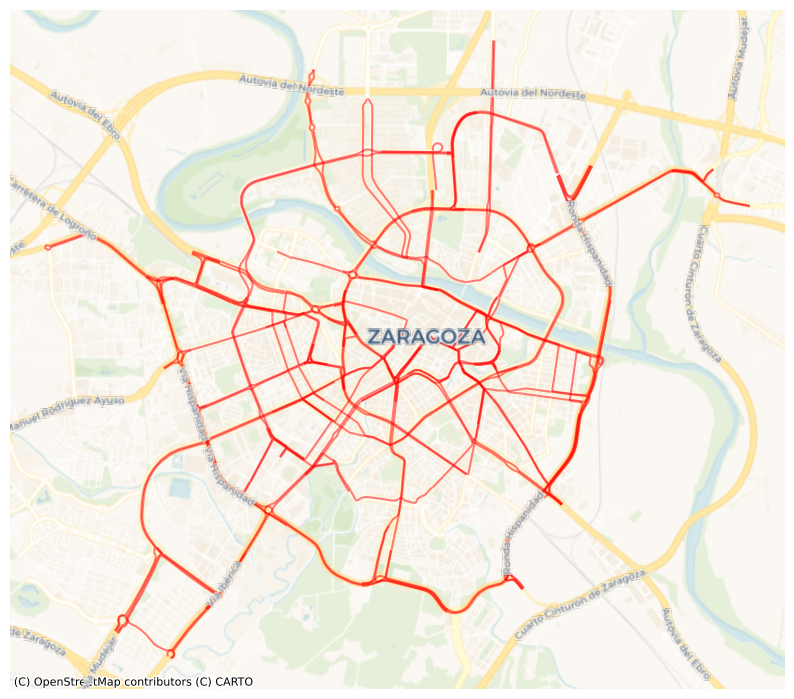

In [47]:
# Plot sensors
import contextily as cx
ax = gdf.plot(color = 'r', markersize = 10, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')

# Ref "VIAS"

In [4]:
ref = gpd.read_file('raw/Vias.json')
ref.to_crs('epsg:4326', inplace=True)

In [5]:
ref.shape

(3401, 17)

In [6]:
ref.columns

Index(['id', 'nombre_publico', 'codigo', 'tipo_via', 'barrio_rural',
       'codigo_via_ant', 'codigo_via_entrada', 'codigo_via_nu',
       'codigo_via_salida', 'estado', 'fecha_acuerdo', 'fecha_baja',
       'fecha_propuesta', 'nombre', 'nombre_completo', 'nombre_reducido',
       'geometry'],
      dtype='object')

In [7]:
ref.tipo_via.unique()

array(['CL', 'AN', 'CN', 'CT', 'PL', 'GL', 'RD', 'JR', 'PS', 'AV', 'UR',
       'PQ', 'PT', 'VI', 'GP', 'PG', 'CJ', 'BLV', 'EB', 'RT', 'CR', 'ST',
       'PJ', 'BR', 'TR', 'LG', 'RC', 'PA', None], dtype=object)

In [8]:
'Cinturón' in ref.nombre_reducido

False

In [9]:
ref[['Cinturón' in k for k in ref.nombre_publico]]

,id,nombre_publico,codigo,tipo_via,barrio_rural,codigo_via_ant,codigo_via_entrada,codigo_via_nu,codigo_via_salida,estado,fecha_acuerdo,fecha_baja,fecha_propuesta,nombre,nombre_completo,nombre_reducido,geometry


(-1.1779136522416846,
 -0.7237746190247161,
 41.471533317858906,
 41.80440702808609)

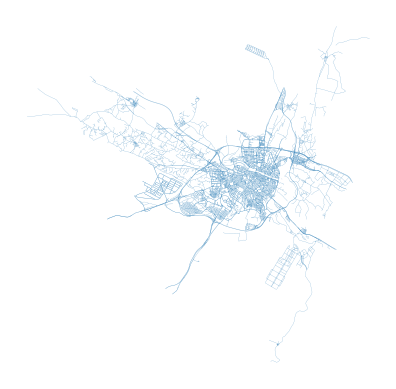

In [11]:
ref.plot(lw = .1)
plt.axis('off')

<Axes: >

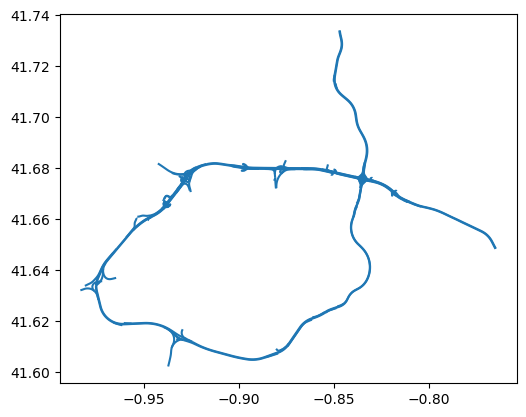

In [12]:
ref[
    (ref.codigo == 99994)|
    (ref.codigo == 99964)
].plot()

In [13]:
ref[
    (ref.id == 'Vias.12071')|
    (ref.id == 'Vias.12091')
] #.explore()

,id,nombre_publico,codigo,tipo_via,barrio_rural,codigo_via_ant,codigo_via_entrada,codigo_via_nu,codigo_via_salida,estado,fecha_acuerdo,fecha_baja,fecha_propuesta,nombre,nombre_completo,nombre_reducido,geometry
3367,Vias.12071,,99964,None,None,NaN,NaN,None,NaN,None,NaT,NaT,None,None,None,None,"MULTILINESTRING ((-0.98333 41.63202, -0.9825 4..."
3387,Vias.12091,,99994,None,None,NaN,NaN,None,NaN,None,NaT,NaT,None,None,None,None,"MULTILINESTRING ((-0.96421 41.6483, -0.96547 4..."


# Traffic data

In [16]:
df = pd.read_csv('raw/response_1734605890467.csv', delimiter = ';')

In [17]:
df

,id,idTemporal,anyo,mes,dia,fecha,lastUpdated,zona,zonaTraficoId,zonaTraficoName,aforoMedio,aforoMaximo
0,259,2019,2019,NaN,NaN,2019-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,1,NaN,12140.5460,31320
1,260,2019,2019,NaN,NaN,2019-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,2,NaN,16762.0470,31320
2,261,2019,2019,NaN,NaN,2019-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,3,NaN,14505.0000,27696
3,262,2019,2019,NaN,NaN,2019-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,4,NaN,18288.2900,37526
4,263,2019,2019,NaN,NaN,2019-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,5,NaN,6662.7646,11613
...,...,...,...,...,...,...,...,...,...,...,...,...
76,281,2017,2017,NaN,NaN,2017-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,5,NaN,6980.4707,11834
77,282,2017,2017,NaN,NaN,2017-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,6,NaN,7537.2812,13883
78,283,2017,2017,NaN,NaN,2017-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,7,NaN,11075.1420,23940
79,284,2017,2017,NaN,NaN,2017-01-01T00:00:00Z,2023-03-27T00:00:00Z,NaN,8,NaN,9861.1050,23096


In [18]:
df.id.unique()

array([259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 341, 342, 343, 344, 345, 346, 347, 348, 349, 321, 322, 323,
       324, 325, 326, 327, 328, 329, 296, 297, 298, 299, 300, 301, 302,
       303, 330, 331, 332, 333, 334, 335, 336, 337, 338, 295, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 277, 278, 279, 280, 281, 282,
       283, 284, 285], dtype=int64)

In [21]:
ref.id.unique()

array(['Vias.9569', 'Vias.10292', 'Vias.12730', ..., 'Vias.10417',
       'Vias.9977', 'Vias.12727'], dtype=object)

In [48]:
# We don't really have a match there
gdf.id.unique()

array([3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26,
       27, 28, 29, 30, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 74, 75, 80, 81, 82, 83, 84, 399, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 161, 162, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204,
       205, 206, 397, 208, 209, 210, 211, 212, 213, 217, 220, 221, 222,
       223, 224, 225, 226, 229, 230, 455, 232, 233, 235, 236, 237, 398,
       240, 247, 248, 249, 250, 253, 254, 257, 258, 260, 

In [51]:
# We are not sure that the "id" feature corresponds
df = df.set_index('id').join(
    gdf.set_index('id'), 
    how = 'inner'
)

In [53]:
df = gpd.GeoDataFrame(
    df,
    geometry = 'geometry',
    crs = 'epsg:4326'
)

In [57]:
df.shape

(61, 14)

(-0.9318361422302507,
 -0.8546039388954885,
 41.612770766385665,
 41.67526934570245)

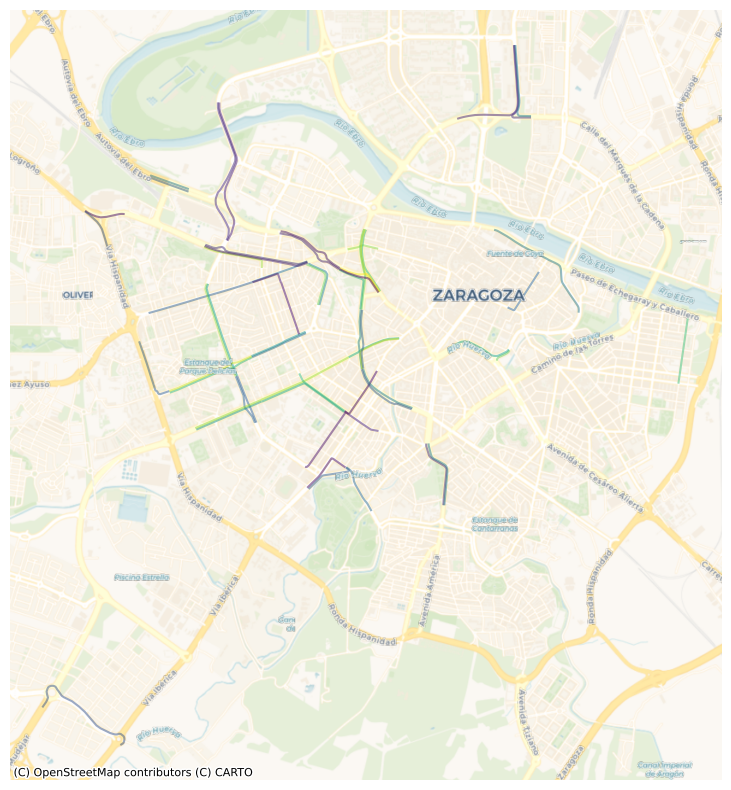

In [59]:
# We can be sure it is the corrects ids
ax = df.plot('aforoMedio', markersize = 10, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')